In [3]:
!git clone https://github.com/Hotsnown/seminaire-bordeaux-2022.git seminaire &> /dev/null
%pip install nbautoeval &> /dev/null

Allez directement à Pandas

In [4]:
import requests

with requests.get("https://case.law/download/bulk_exports/latest/by_jurisdiction/case_text_open/ark/ark_text.zip", stream=True) as r:
        r.raise_for_status()
        with open("corpus.zip", 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                #if chunk: 
                f.write(chunk)

In [5]:
import zipfile

with zipfile.ZipFile("corpus.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [6]:
!xz --decompress /content/data/ark_text_20210921/data/data.jsonl.xz

In [7]:
import json
import pandas as pd

In [10]:
with open('/content/data/ark_text_20210921/data/data.jsonl', 'r') as json_file:
    json_list = list(json_file)

results = []
for json_str in json_list:
  text = json.loads(json_str)
  if text["casebody"]["data"]["opinions"]:
    results.append(
    [text["casebody"]["data"]["opinions"][0]["text"],
    text["court"]["name"],
    text["frontend_url"],
    text["decision_date"],
    text["name_abbreviation"],
    text["casebody"]["data"]["opinions"][0]["author"],]
      )

### Pandas

In [17]:
    df = pd.DataFrame(results, columns=["text", "court", "url", "date", "name_abbreviation", "author"])
    df.head()

,text,court,url,date,name_abbreviation,author
0,"ROBERT J. GLADWIN, Judge\nh The Arkansas Worke...",Arkansas Court of Appeals,https://cite.case.law/sw3d/533/596/,2017-11-08,"Stoker v. Thomas Randal Fowler, Inc.","ROBERT J. GLADWIN, Judge"
1,"RAYMOND R. ABRAMSON, Judge\n11 Larry L. Harris...",Arkansas Court of Appeals,https://cite.case.law/sw3d/533/648/,2017-11-15,"Harrison v. Street & Performance, Inc.","RAYMOND R. ABRAMSON, Judge"
2,"RAYMOND R. ABRAMSON, Judge\nOn August 25, 2016...",Arkansas Court of Appeals,https://cite.case.law/sw3d/533/130/,2017-11-01,Sanders v. State,"RAYMOND R. ABRAMSON, Judge"
3,"N. MARK KLAPPENBACH, Judge\n| ¶ Appellant Wayn...",Arkansas Court of Appeals,https://cite.case.law/sw3d/533/587/,2017-11-01,Ray v. State,"N. MARK KLAPPENBACH, Judge"
4,"ROBERT J. GLADWIN, Judge\nliThe Ouachita Count...",Arkansas Court of Appeals,https://cite.case.law/sw3d/533/654/,2017-11-15,Meyers v. Arkansas Department of Human Services,"ROBERT J. GLADWIN, Judge"


Introduction

Voici votre premier mini-projet sur le traitement du langage naturel (NLP). En d'autres termes, nous allons apprendre à la machine à lire ! Tout d'abord, nous allons voir comment faire de l'exploration de texte simple sur un dataset du CAP (arkansas).

Dans ce premier mini-projet, vous apprendrez à :

- accéder au jeu de données et le comprendre
- le convertir en un DataFrame pandas pour une simple exploration de texte.

# Blueprint : Obtenir une vue d'ensemble des données avec Pandas


## Calcul des statistiques sommaires pour les colonnes

Le but n'est pas de vous apprendre les pandas ici, car il existe d'excellents tutoriels. Le but est de vous montrer à quel point Pandas est puissant et rapide.

Dans ipython, après avoir exécuté le script, nous avons un accès interactif à notre objet DataFrame, appelé df.

Commençons par examiner les valeurs possibles pour les étoiles :

In [ ]:
authors = df['author']
authors = authors.dropna()
sorted(authors.unique())

In [20]:
df['length'] = df['text'].str.len()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,60565.0,9106.341319,7176.908728,0.0,4366.0,7386.0,11921.0,184862.0


In [21]:
df[['court', 'author']].describe(include='O').T

,count,unique,top,freq
court,60565,30,Arkansas Supreme Court,50954
author,60187,4607,Per Curiam.,2671


## Vérification des données manquantes

In [22]:
df.isna().sum()

text                   0
court                  0
url                    0
date                   0
name_abbreviation      0
author               378
length                 0
dtype: int64

In [23]:
df['author'].fillna('unkown', inplace=True)

In [25]:
df[df['author'].str.contains('Per Curiam.')]['author'].value_counts()

Per Curiam.                                          2671
Per Curiam :                                           17
Per Curiam:                                            17
Per Curiam,                                             4
Per Curiam;.                                            2
Per Curiam. Tom Glaze, Justice.                         2
Tom Glaze, Judge. Per Curiam.                           2
M. Steele Hays, Judge. Per Curiam.                      1
Per Curiam. Robert L. Brown, Justice.                   1
Per Curiam. Per Curiam.                                 1
Jack Holt, Jr., Chief Justice. Per Curiam.              1
Grieein Smith, Chief Justice. Per Curiam.               1
James R. Cooper, Judge. Per Curiam.                     1
Annabelle Clinton Imber, Justice. Per Curiam. 28,       1
Dunaway, J. Griffin Smith, C. J., Per Curiam.           1
Per Curiam. Bradley D. Jesson, Chief Justice.           1
David Newbern, Judge. Per Curiam.                       1
Griffin Smith,

## Représenter les distributions de valeurs

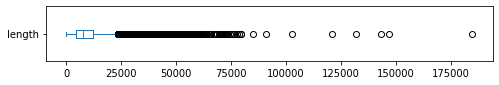

In [26]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

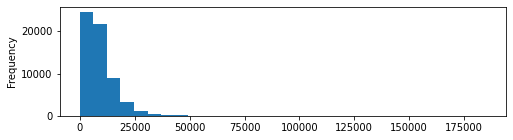

In [27]:
df['length'].plot(kind='hist', bins=30, figsize=(8,2))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


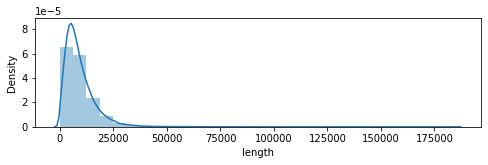

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
sns.distplot(df['length'], bins=30, kde=True);

In [31]:
df['court'].value_counts()

Arkansas Supreme Court                                     50954
Arkansas Court of Appeals                                   8506
Superior Court of the Territory of Arkansas                  250
Court of Appeals of Arkansas, DIVISION IV                    187
Court of Appeals of Arkansas, DIVISION I                     177
Court of Appeals of Arkansas, DIVISION II                    176
Court of Appeals of Arkansas, DIVISION III                   166
Arkansas Circuit Court                                        57
Arkansas Superior Court                                       38
Arkansas District Court                                       13
Court of Appeals of Arkansas, DIVISIONS III & IV               7
Court of Appeals of Arkansas, DIVISIONS II & III               6
Court of Appeals of Arkansas, DIVISIONS I & II                 5
Court of Appeals of Arkansas, DIVISIONS I & IV                 4
Court of Appeals of Arkansas, DIVISIONS I, III & IV            3
Court of Appeals of Arkan

## Comparaison des distributions de valeur entre les catégories

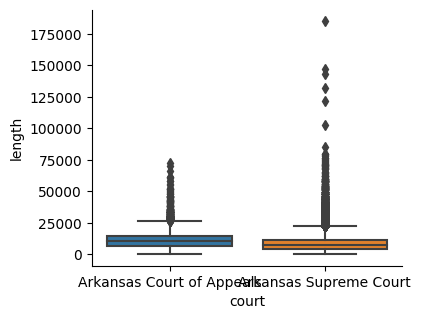

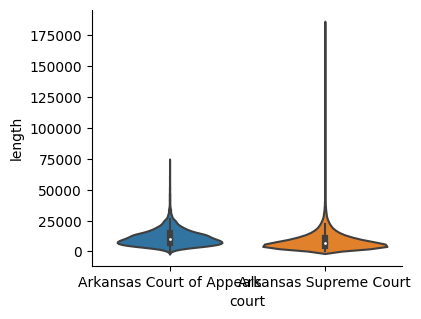

In [ ]:
where = df['court'].isin(['Arkansas Supreme Court', 'Arkansas Court of Appeals'])
g = sns.catplot(data=df[where], x="court", y="length", kind='box')
g.fig.set_size_inches(7, 5) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="court", y="length", kind='violin')
g.fig.set_size_inches(7, 5) ###
g.fig.set_dpi(100) ###

## Visualiser les développements au fil du temps

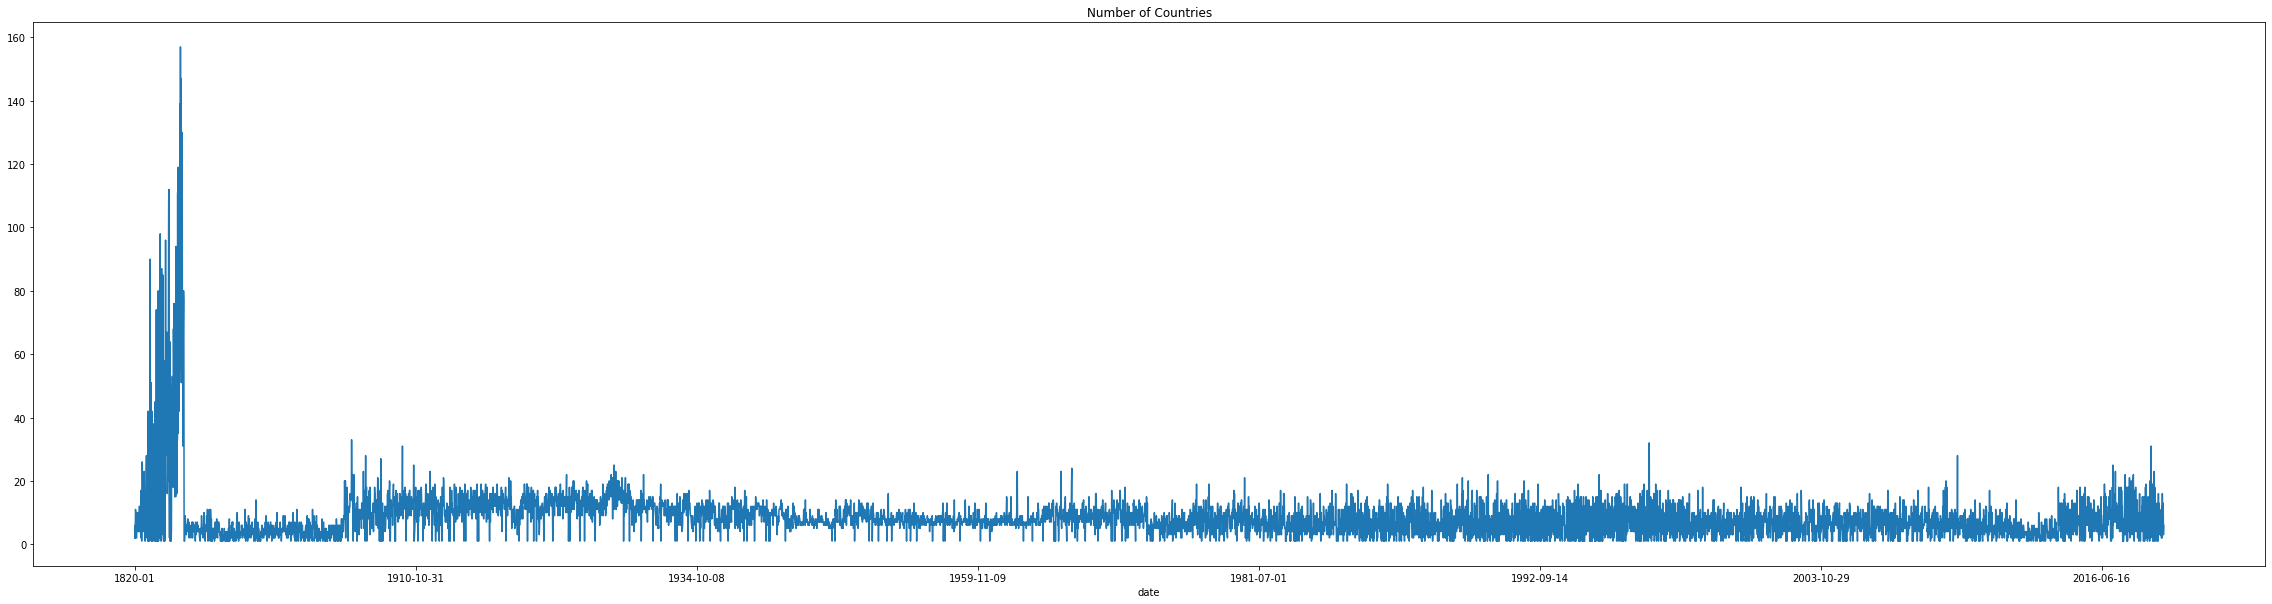

In [39]:
df.groupby('date').size().plot(title="Nombre de décisions", figsize=(40,10))

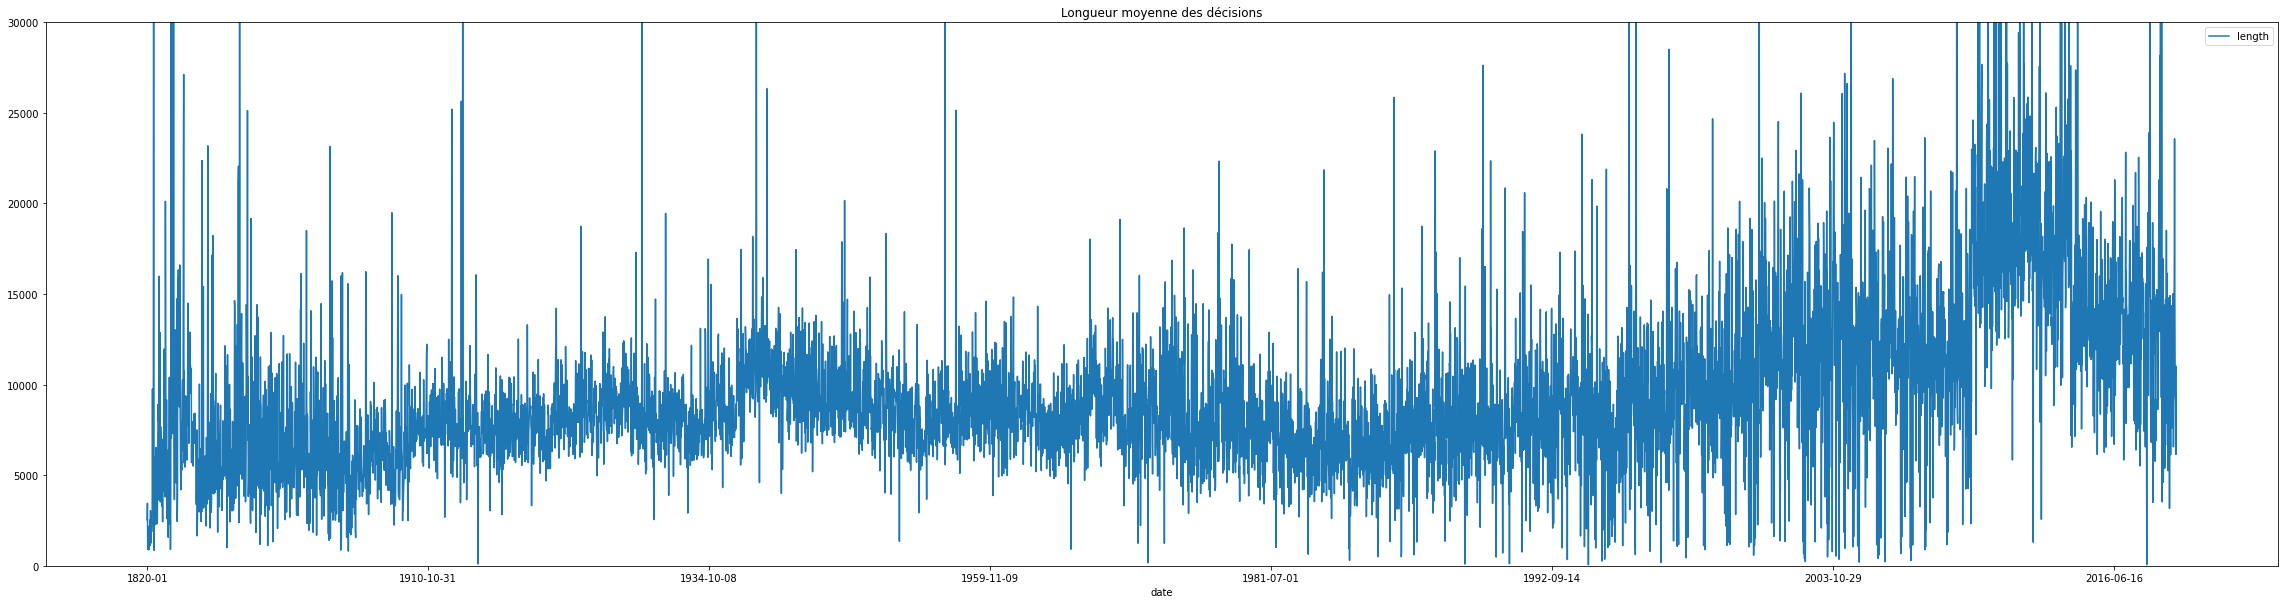

In [40]:
df.groupby('date').agg({'length': 'mean'}) \
  .plot(title="Longueur moyenne des décisions", ylim=(0,30000), figsize=(40,10))

## A vous de jouer

En prenant example sur le code précédent, répondez aux questions suivantes :


- Quelle est la longueur moyenne d'un titre de décision ?

#TODO


- Combien y-a-t'il eu de décisions en 2017 ?

#TODO

- En moyenne, le texte d'une décision est-il plus long en 1820 ou en 2017 ?

#TODO

- En utilisant le titre des décisions, dans combien de décisions l'état d'arkansas a-t-il été partie?

#TODO

- Existe-t'il des duplicatas de titres de décisions ? Deux titres sont des duplicatas si les strings sont identiques.

#TODO

1. Jour 1
    * Variables
        * [exercice1](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/1.%20variables/1.1%20helloworld.ipynb)
        * [exercice2](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/1.%20variables/1.2%20%C3%A9viter%20les%20errreurs%20de%20nommage.ipynb)
        * [mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/1.%20variables/1.3%20mini-project.ipynb#scrollTo=RPB2xCMdA6lV)
    * Strings
        * [exercice1](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/2.%20strings/2.1%20concat.ipynb)
        * [exercice2](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/2.%20strings/2.2%20string_methods.ipynb)
        * [mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/2.%20strings/2.3%20mini-project.ipynb)
    * Opérations
        * [exercice1](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/3.%20operations/3.1%20math.ipynb)
        * [exercice2](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/3.%20operations/3.2%20bool%C3%A9en.ipynb)
        * [mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour1/3.%20operations/3.3%20mini-project.ipynb)

2. Jour 2
    * Listes
        * [Définition](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.1%20Listes/2.1.1%20d%C3%A9finition%20liste.ipynb?hl=fr)
        * [Strings et listes](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.1%20Listes/2.1.2%20String%20as%20list%20of%20characters.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.1%20Listes/2.1.3%20mini-project.ipynb?hl=fr)
    * Fonctions
        * [Définition I](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.2%20Fonctions/2.2.1%20d%C3%A9finition%20fonctions.ipynb?hl=fr)
        * [Définition II](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.2%20Fonctions/2.2.2%20scope%20et%20fonctions%20imbriqu%C3%A9es.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.2%20Fonctions/2.2.3%20mini-project.ipynb?hl=fr) 
    * Librairies
        * [Pandas](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.3%20Librairies/2.3.1%20Pandas.ipynb?hl=fr)
        * [Matplotlib](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.3%20Librairies/2.3.2%20Matplotlib.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour2/2.3%20Librairies/2.3.3%20mini-project.ipynb?hl=fr) 
3. Jour 3
    * Introduction à la NLP
        * [Charger des un corpus](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.1%20what%20is%20nlp/3.1.1%20Accessing%20Text.ipynb?hl=fr)
        * [Traitement de texte dans Pandas](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.1%20what%20is%20nlp/3.1.2%20Working%20with%20text%20data%20in%20pandas.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.1%20what%20is%20nlp/3.1.3%20mini-project.ipynb?hl=fr)
    * Segmentation
        * [Segmentation de tokens](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.2%20Segmentation/3.2.1%20Token%20segmentation.ipynb?hl=fr)
        * [Segmentation de phrase](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.2%20Segmentation/3.2.2%20Sentence%20segmentation.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.2%20Segmentation/3.2.3%20mini-project.ipynb?hl=fr)
    * Nettoyage de texte
        * [Stopwords](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.3%20text%20cleaning.ipynb/3.3.1%20stopwords.ipynb?hl=fr)
        * [Normalisation](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.3%20text%20cleaning.ipynb/3.3.2%20Normalizing%20Text.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour3/3.3%20text%20cleaning.ipynb/3.3.3%20mini-project.ipynb?hl=fr)
4. Jour 4
    * Apprentissage supervisé
        * [Régression linéaire](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.1%20supervised%20learning/4.3.1%20linear%20regression.ipynb?hl=fr)
        * [Evaluation](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.1%20supervised%20learning/4.3.2%20evaluale.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.1%20supervised%20learning/4.3.3%20mini-project.ipynb?hl=fr)
    * Pré-traitement de texte
        * [Featurization de textes](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.2%20text%20preprocessing/4.2.1%20text%20featurization.ipynb?hl=fr)
        * [Featurization de labels](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.2%20text%20preprocessing/4.2.2%20label%20featurization.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.2%20text%20preprocessing/4.2.3%20mini-project.ipynb?hl=fr)
    * Classification de texte
        * [EDA](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.3%20text%20classification/4.1.1%20EDA.ipynb?hl=fr)
        * [Apprentissage supervisé textuel](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.3%20text%20classification/4.1.1%20EDA.ipynb?hl=fr)
        * [Mini-projet](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour4/4.3%20text%20classification/4.1.3%20mini-project.ipynb?hl=fr)
5. Jour 5
    * [Projet final](https://colab.research.google.com/github/Hotsnown/seminaire-bordeaux-2022/blob/master/exercices/jour5/final-project.ipynb?hl=fr)